In [7]:
import numpy as np
import pandas as pd
import seaborn as sns

In [9]:
df=pd.read_csv("fifa 19 data.csv")

In [10]:
df.reset_index(inplace=True)
df.set_index("ID",inplace=True)

In [11]:
df.dtypes.tolist()
df.drop(df.select_dtypes(['object']), inplace=True, axis=1)

In [12]:
df.drop(df.columns[0], axis=1)
df.fillna(0,inplace=True)


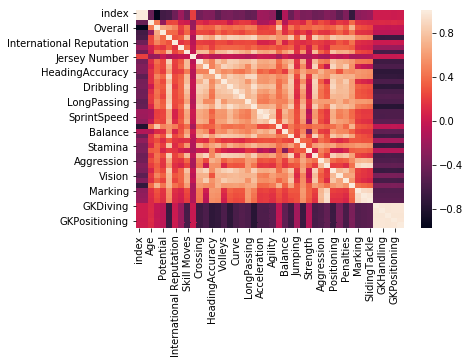

In [13]:
corr=df.corr()
sns.heatmap(corr)

In [14]:
corr["Age"]

index                      -0.454846
Unnamed: 0                 -0.454846
Age                         1.000000
Overall                     0.452350
Potential                  -0.253312
Special                     0.236695
International Reputation    0.251032
Weak Foot                   0.058586
Skill Moves                 0.027481
Jersey Number              -0.240440
Crossing                    0.129333
Finishing                   0.068252
HeadingAccuracy             0.145490
ShortPassing                0.130303
Volleys                     0.141379
Dribbling                   0.010242
Curve                       0.142057
FKAccuracy                  0.191892
LongPassing                 0.178570
BallControl                 0.083770
Acceleration               -0.154412
SprintSpeed                -0.147450
Agility                    -0.018627
Reactions                   0.427307
Balance                    -0.087136
ShotPower                   0.154884
Jumping                     0.170647
S

In [15]:
df[(df["Age"]>20)].mean()

index                       8015.316129
Unnamed: 0                  8015.316129
Age                           26.504234
Overall                       67.703965
Potential                     70.848320
Special                     1631.841129
International Reputation       1.134543
Weak Foot                      2.957124
Skill Moves                    2.388911
Jersey Number                 17.592944
Crossing                      51.007796
Finishing                     46.360148
HeadingAccuracy               53.403024
ShortPassing                  59.738844
Volleys                       43.957796
Dribbling                     56.007661
Curve                         48.316667
FKAccuracy                    44.068481
LongPassing                   53.951142
BallControl                   59.328696
Acceleration                  64.477218
SprintSpeed                   64.705175
Agility                       63.790524
Reactions                     63.396438
Balance                       63.612433


In [16]:
df[(df["Age"]<20)].mean()

index                       14784.614279
Unnamed: 0                  14784.614279
Age                            18.311931
Overall                        58.393867
Potential                      73.447053
Special                      1414.223287
International Reputation        1.001437
Weak Foot                       2.852899
Skill Moves                     2.168663
Jersey Number                  30.111644
Crossing                       41.853857
Finishing                      40.654528
HeadingAccuracy                45.612362
ShortPassing                   51.722568
Volleys                        36.855295
Dribbling                      50.449928
Curve                          40.460949
FKAccuracy                     36.094394
LongPassing                    44.986104
BallControl                    51.812650
Acceleration                   63.678007
SprintSpeed                    63.011979
Agility                        60.529947
Reactions                      52.617154
Balance         

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import MeanShift
import pickle

In [21]:
clf=MeanShift()
X_train=np.array(df)
clf.fit(X_train)

filename = 'MeanShiftFifa19.pkl'
pickle.dump(clf, open(filename, 'wb'))

In [26]:
clf = pickle.load(open(filename, 'rb'))
df["Label"]=np.array(clf.labels_)

In [28]:
df[(df["Label"]==2)].describe()

,index,Unnamed: 0,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Label
count,5579.000000,5579.000000,5579.000000,5579.000000,5579.000000,5579.000000,5579.000000,5579.000000,5579.000000,5579.000000,...,5579.000000,5579.000000,5579.000000,5579.000000,5579.000000,5579.000000,5579.000000,5579.000000,5579.000000,5579.0
mean,2789.000358,2789.000358,27.200932,74.121706,76.506901,1784.299158,1.350242,3.098225,2.731852,16.287686,...,68.283026,53.473024,53.738125,50.937802,16.361534,16.170281,15.859473,16.249149,16.436458,2.0
std,1610.663528,1610.663528,4.074859,3.804716,4.762907,241.538432,0.636753,0.703698,0.838399,14.756037,...,8.664374,21.212818,23.118626,23.221730,18.626164,17.767886,17.042582,18.225971,18.976993,0.0
min,0.000000,0.000000,17.000000,70.000000,70.000000,909.000000,1.000000,1.000000,1.000000,0.000000,...,3.000000,7.000000,7.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.0
25%,1394.500000,1394.500000,24.000000,71.000000,73.000000,1707.500000,1.000000,3.000000,2.000000,7.000000,...,64.000000,35.000000,32.000000,28.000000,8.000000,8.000000,8.000000,8.000000,8.000000,2.0
50%,2789.000000,2789.000000,27.000000,73.000000,76.000000,1835.000000,1.000000,3.000000,3.000000,13.000000,...,69.000000,62.000000,65.000000,61.000000,11.000000,11.000000,11.000000,11.000000,11.000000,2.0
75%,4183.500000,4183.500000,30.000000,76.000000,80.000000,1938.000000,2.000000,4.000000,3.000000,22.000000,...,74.000000,71.000000,73.000000,71.000000,14.000000,14.000000,14.000000,14.000000,14.000000,2.0
max,5580.000000,5580.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000,2.0


In [29]:
df[(df["Label"]==3)].describe()

,index,Unnamed: 0,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Label
count,5067.000000,5067.000000,5067.000000,5067.000000,5067.000000,5067.000000,5067.000000,5067.000000,5067.000000,5067.00000,...,5067.000000,5067.000000,5067.000000,5067.000000,5067.000000,5067.000000,5067.000000,5067.000000,5067.000000,5067.0
mean,15672.999605,15672.999605,21.867180,57.952832,67.400434,1389.833827,0.991711,2.752319,1.953424,24.52911,...,47.865798,39.277679,39.979672,38.884744,17.555556,17.241958,17.094139,17.060193,17.558911,3.0
std,1462.861921,1462.861921,4.024834,3.515566,5.530423,227.272181,0.102911,0.647532,0.567408,16.40340,...,9.901855,17.907019,19.636124,19.073914,17.665025,16.941677,16.754563,16.533022,17.772175,0.0
min,13139.000000,13139.000000,16.000000,46.000000,48.000000,731.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
25%,14406.500000,14406.500000,19.000000,56.000000,63.000000,1313.500000,1.000000,2.000000,2.000000,14.00000,...,42.000000,23.000000,19.000000,19.000000,8.000000,8.000000,8.000000,8.000000,8.000000,3.0
50%,15673.000000,15673.000000,21.000000,59.000000,67.000000,1445.000000,1.000000,3.000000,2.000000,23.00000,...,49.000000,44.000000,45.000000,44.000000,11.000000,11.000000,11.000000,11.000000,11.000000,3.0
75%,16939.500000,16939.500000,24.000000,61.000000,71.000000,1544.000000,1.000000,3.000000,2.000000,32.00000,...,55.000000,55.000000,58.000000,56.000000,14.000000,14.000000,14.000000,14.000000,14.000000,3.0
max,18206.000000,18206.000000,44.000000,62.000000,86.000000,1879.000000,2.000000,5.000000,4.000000,99.00000,...,82.000000,73.000000,76.000000,74.000000,75.000000,69.000000,69.000000,69.000000,71.000000,3.0


In [32]:
df[(df["Label"]==1)].describe()

,index,Unnamed: 0,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Label
count,3757.000000,3757.000000,3757.000000,3757.000000,3757.000000,3757.000000,3757.000000,3757.000000,3757.000000,3757.000000,...,3757.000000,3757.000000,3757.000000,3757.000000,3757.000000,3757.000000,3757.000000,3757.000000,3757.000000,3757.0
mean,7457.000799,7457.000799,26.320735,67.688315,71.126963,1639.786798,1.021027,2.977908,2.450892,17.780144,...,60.499335,48.794783,49.032207,46.812883,16.045781,15.825126,15.832579,15.962204,16.216928,1.0
std,1084.700035,1084.700035,4.176884,1.063733,4.211730,214.366982,0.147159,0.661421,0.699572,15.508924,...,8.032834,19.184567,21.046876,20.742176,17.151320,16.403103,16.037593,16.530772,17.525094,0.0
min,5578.000000,5578.000000,17.000000,66.000000,66.000000,857.000000,1.000000,1.000000,1.000000,0.000000,...,12.000000,4.000000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
25%,6518.000000,6518.000000,23.000000,67.000000,68.000000,1581.000000,1.000000,3.000000,2.000000,7.000000,...,57.000000,31.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1.0
50%,7457.000000,7457.000000,26.000000,68.000000,70.000000,1695.000000,1.000000,3.000000,3.000000,15.000000,...,62.000000,58.000000,60.000000,57.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1.0
75%,8396.000000,8396.000000,29.000000,69.000000,74.000000,1778.000000,1.000000,3.000000,3.000000,23.000000,...,66.000000,65.000000,67.000000,65.000000,14.000000,14.000000,14.000000,14.000000,14.000000,1.0
max,9337.000000,9337.000000,41.000000,70.000000,89.000000,2036.000000,3.000000,5.000000,5.000000,99.000000,...,82.000000,82.000000,78.000000,82.000000,79.000000,76.000000,77.000000,77.000000,83.000000,1.0
